# Trabalho 4 - Data Mining
# Aluno: Vinicius Cebalhos
## Parte 1: Regras de Associação

Este notebook implementa o algoritmo Apriori para análise de regras de associação usando dados de compras de supermercado.


In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [2]:
# Carregar e examinar os dados
print("Carregando dados do supermercado...")

# Ler o arquivo CSV
with open('supermercado.csv', 'r') as file:
    data = file.readlines()

# Processar os dados - cada linha é uma transação
transactions = []
for line in data:
    # Remover quebra de linha e dividir por vírgula
    items = line.strip().split(',')
    # Remover espaços em branco e filtrar itens vazios
    items = [item.strip() for item in items if item.strip()]
    # Garantir que não há itens duplicados na mesma transação
    items = list(set(items))
    if items:  # Só adicionar se a transação não estiver vazia
        transactions.append(items)

print(f"Número total de transações: {len(transactions)}")
print(f"Primeiras 5 transações:")
for i, trans in enumerate(transactions[:5]):
    print(f"Transação {i+1}: {trans}")


Carregando dados do supermercado...
Número total de transações: 9835
Primeiras 5 transações:
Transação 1: ['ready soups', 'margarine', 'semi-finished bread', 'citrus fruit']
Transação 2: ['coffee', 'yogurt', 'tropical fruit']
Transação 3: ['whole milk']
Transação 4: ['yogurt', 'pip fruit', 'cream cheese', 'meat spreads']
Transação 5: ['condensed milk', 'other vegetables', 'long life bakery product', 'whole milk']


In [3]:
# Converter transações para formato binário (one-hot encoding)
print("Convertendo transações para formato binário...")

# Usar TransactionEncoder do mlxtend
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Shape da matriz binária: {df.shape}")
print(f"Número de itens únicos: {len(te.columns_)}")
print(f"Primeiros 5 itens: {list(te.columns_[:5])}")

# Verificar se 'bottled beer' está presente nos dados
if 'bottled beer' in te.columns_:
    print(f"\n'bottled beer' encontrado nos dados!")
    print(f"Frequência de 'bottled beer': {df['bottled beer'].sum()}")
else:
    print("\n'bottled beer' NÃO encontrado nos dados!")
    print("Itens que contêm 'beer':", [item for item in te.columns_ if 'beer' in item.lower()])


Convertendo transações para formato binário...
Shape da matriz binária: (9835, 169)
Número de itens únicos: 169
Primeiros 5 itens: ['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics']

'bottled beer' encontrado nos dados!
Frequência de 'bottled beer': 792


In [4]:
# Executar algoritmo Apriori
print("Executando algoritmo Apriori...")
print("Parâmetros: suporte mínimo = 0.001, confiança = 0.25")

# Aplicar algoritmo Apriori
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

print(f"\nNúmero de itemsets frequentes encontrados: {len(frequent_itemsets)}")
print(f"Itemsets com maior suporte:")
print(frequent_itemsets.nlargest(10, 'support'))


Executando algoritmo Apriori...
Parâmetros: suporte mínimo = 0.001, confiança = 0.25

Número de itemsets frequentes encontrados: 13492
Itemsets com maior suporte:
      support            itemsets
154  0.255516        (whole milk)
96   0.193493  (other vegetables)
115  0.183935        (rolls/buns)
130  0.174377              (soda)
155  0.139502            (yogurt)
10   0.110524     (bottled water)
116  0.108998   (root vegetables)
147  0.104931    (tropical fruit)
125  0.098526     (shopping bags)
122  0.093950           (sausage)


In [5]:
# Gerar regras de associação
print("Gerando regras de associação...")

# Gerar todas as regras
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)

print(f"Número total de regras geradas: {len(rules)}")

# Filtrar regras que têm 'bottled beer' no consequente
bottled_beer_rules = rules[rules['consequents'].apply(lambda x: 'bottled beer' in x)]

print(f"\nRegras com 'bottled beer' no consequente: {len(bottled_beer_rules)}")

if len(bottled_beer_rules) > 0:
    print("\nRegras encontradas:")
    print(bottled_beer_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string())
else:
    print("Nenhuma regra com 'bottled beer' no consequente foi encontrada.")
    print("Vamos verificar se existem regras com 'bottled beer' no antecedente:")
    bottled_beer_antecedent = rules[rules['antecedents'].apply(lambda x: 'bottled beer' in x)]
    print(f"Regras com 'bottled beer' no antecedente: {len(bottled_beer_antecedent)}")
    if len(bottled_beer_antecedent) > 0:
        print(bottled_beer_antecedent[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Gerando regras de associação...
Número total de regras geradas: 19390

Regras com 'bottled beer' no consequente: 15

Regras encontradas:
                                           antecedents     consequents   support  confidence       lift
27                                            (liquor)  (bottled beer)  0.004677    0.422018   5.240594
28                                    (red/blush wine)  (bottled beer)  0.004881    0.253968   3.153760
29                                               (tea)  (bottled beer)  0.001118    0.289474   3.594664
1016                            (bottled water, herbs)  (bottled beer)  0.001220    0.400000   4.967172
1021                              (bottled water, oil)  (bottled beer)  0.001220    0.292683   3.634516
1030                            (bottled water, sugar)  (bottled beer)  0.001220    0.255319   3.170535
1041                                  (onions, butter)  (bottled beer)  0.001017    0.250000   3.104482
1103                          (

In [6]:
# Análise detalhada dos resultados
print("=== ANÁLISE DETALHADA DOS RESULTADOS ===\n")

# 1. Estatísticas gerais
print("1. ESTATÍSTICAS GERAIS:")
print(f"   - Total de transações: {len(transactions)}")
print(f"   - Total de itens únicos: {len(te.columns_)}")
print(f"   - Itemsets frequentes encontrados: {len(frequent_itemsets)}")
print(f"   - Regras de associação geradas: {len(rules)}")

# 2. Análise de 'bottled beer'
print(f"\n2. ANÁLISE DE 'BOTTLED BEER':")
if 'bottled beer' in te.columns_:
    beer_support = df['bottled beer'].sum() / len(df)
    print(f"   - Suporte de 'bottled beer': {beer_support:.4f} ({df['bottled beer'].sum()} transações)")
    print(f"   - Percentual de transações com 'bottled beer': {beer_support*100:.2f}%")
else:
    print("   - 'bottled beer' não encontrado nos dados")

# 3. Top 10 regras por confiança
print(f"\n3. TOP 10 REGRAS POR CONFIANÇA:")
top_rules = rules.nlargest(10, 'confidence')
for idx, rule in top_rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    print(f"   {antecedents} → {consequents}")
    print(f"      Suporte: {rule['support']:.4f}, Confiança: {rule['confidence']:.4f}, Lift: {rule['lift']:.4f}")

# 4. Análise de regras com 'bottled beer'
if len(bottled_beer_rules) > 0:
    print(f"\n4. REGRAS COM 'BOTTLED BEER' NO CONSEQUENTE:")
    for idx, rule in bottled_beer_rules.iterrows():
        antecedents = ', '.join(list(rule['antecedents']))
        consequents = ', '.join(list(rule['consequents']))
        print(f"   {antecedents} → {consequents}")
        print(f"      Suporte: {rule['support']:.4f}, Confiança: {rule['confidence']:.4f}, Lift: {rule['lift']:.4f}")
else:
    print(f"\n4. NENHUMA REGRA COM 'BOTTLED BEER' NO CONSEQUENTE ENCONTRADA")
    print("   Isso pode indicar que 'bottled beer' não é um item frequente o suficiente")
    print("   ou não há padrões claros de associação com outros itens.")


=== ANÁLISE DETALHADA DOS RESULTADOS ===

1. ESTATÍSTICAS GERAIS:
   - Total de transações: 9835
   - Total de itens únicos: 169
   - Itemsets frequentes encontrados: 13492
   - Regras de associação geradas: 19390

2. ANÁLISE DE 'BOTTLED BEER':
   - Suporte de 'bottled beer': 0.0805 (792 transações)
   - Percentual de transações com 'bottled beer': 8.05%

3. TOP 10 REGRAS POR CONFIANÇA:
   canned fish, hygiene articles → whole milk
      Suporte: 0.0011, Confiança: 1.0000, Lift: 3.9136
   sugar, rice → whole milk
      Suporte: 0.0012, Confiança: 1.0000, Lift: 3.9136
   pip fruit, whipped/sour cream, brown bread → other vegetables
      Suporte: 0.0011, Confiança: 1.0000, Lift: 5.1682
   soft cheese, butter, domestic eggs → whole milk
      Suporte: 0.0010, Confiança: 1.0000, Lift: 3.9136
   pip fruit, butter, hygiene articles → whole milk
      Suporte: 0.0010, Confiança: 1.0000, Lift: 3.9136
   butter, root vegetables, rice → whole milk
      Suporte: 0.0010, Confiança: 1.0000, Lift:

## Conclusões e Análise dos Resultados

### O que foi encontrado de interessante:

1. **Estrutura dos Dados**: O dataset contém 9.835 transações de supermercado com 169 itens únicos, incluindo produtos alimentícios, bebidas, produtos de limpeza, etc.

2. **Implementação do Apriori**: 
   - Utilizamos a biblioteca `mlxtend` do Python
   - Configurações: suporte mínimo = 0.001, confiança = 0.25
   - Garantimos que não há itens duplicados nas transações
   - Encontramos 13.492 itemsets frequentes e geramos 19.390 regras de associação

3. **Análise de 'Bottled Beer'**:
    - O item "bottled beer" aparece em 792 transações (8,05% das transações), sendo relativamente frequente.
    - Encontramos 15 regras que têm "bottled beer" no consequente.
    - A regra mais forte é: **red/blush wine + liquor → bottled beer** com confiança de 90,48% e lift de 11,24.
    - Outras associações importantes incluem: **liquor → bottled beer** (confiança 42,20%, lift 5,24) e **soda + liquor → bottled beer** (confiança 57,14%, lift 7,10).

4. **Interpretação dos Resultados**:
   - As regras mostram que "bottled beer" está fortemente associado a outras bebidas alcoólicas (liquor, red/blush wine), confirmando padrões de consumo conjunto.
   - O lift elevado (acima de 5) indica que a presença de certos produtos multiplica significativamente a chance de comprar cerveja.
   - Regras inesperadas como "soups + whole milk → bottled beer" (confiança 37,93%, lift 4,71) podem indicar padrões de compra para ocasiões especiais ou festas.
   - Essas descobertas podem ser úteis para estratégias de cross-selling e organização de prateleiras em supermercados.




# Parte 2: Mineração de Texto

Esta seção implementa análise de tópicos com LDA e análise de sentimento dos tweets do Trump.


In [ ]:
# Importar bibliotecas para mineração de texto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
from collections import Counter

# Para LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Para análise de sentimento
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Para visualização
import warnings
warnings.filterwarnings('ignore')

# Download de recursos do NLTK
try:
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)  # Adicionar punkt_tab
    nltk.download('stopwords', quiet=True)
    nltk.download('vader_lexicon', quiet=True)
except Exception as e:
    print(f"Erro ao baixar recursos do NLTK: {e}")
    print("Tentando baixar manualmente...")
    try:
        nltk.download('punkt_tab')
    except:
        pass

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [8]:
# Carregar dados dos tweets
print("Carregando dados dos tweets do Trump...")

df_tweets = pd.read_csv('tweets_trump.csv')

print(f"Shape dos dados: {df_tweets.shape}")
print(f"Colunas disponíveis: {list(df_tweets.columns)}")
print(f"\nPrimeiras 3 linhas:")
print(df_tweets.head(3))

# Verificar tipos de dados
print(f"\nTipos de dados:")
print(df_tweets.dtypes)

# Verificar valores nulos
print(f"\nValores nulos por coluna:")
print(df_tweets.isnull().sum())


Carregando dados dos tweets do Trump...
Shape dos dados: (56571, 9)
Colunas disponíveis: ['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites', 'retweets', 'date', 'isFlagged']

Primeiras 3 linhas:
                    id                                               text  \
0    98454970654916608  Republicans and Democrats have both created ou...   
1  1234653427789070336  I was thrilled to be back in the Great city of...   
2  1218010753434820614  RT @CBS_Herridge: READ: Letter to surveillance...   

  isRetweet isDeleted              device  favorites  retweets  \
0         f         f           TweetDeck         49       255   
1         f         f  Twitter for iPhone      73748     17404   
2         t         f  Twitter for iPhone          0      7396   

                  date isFlagged  
0  2011-08-02 18:07:48         f  
1  2020-03-03 01:34:50         f  
2  2020-01-17 03:22:47         f  

Tipos de dados:
id            int64
text         object
isRetweet    object
is

In [9]:
# Garantir que os recursos do NLTK estão disponíveis
print("Verificando e baixando recursos do NLTK...")

def ensure_nltk_resources():
    """Garantir que todos os recursos necessários do NLTK estão disponíveis"""
    resources = ['punkt', 'punkt_tab', 'stopwords', 'vader_lexicon']
    
    for resource in resources:
        try:
            nltk.data.find(f'tokenizers/{resource}')
            print(f"✓ {resource} já disponível")
        except LookupError:
            print(f"⬇ Baixando {resource}...")
            try:
                nltk.download(resource, quiet=True)
                print(f"✓ {resource} baixado com sucesso")
            except Exception as e:
                print(f"✗ Erro ao baixar {resource}: {e}")

# Executar verificação
ensure_nltk_resources()
print("Verificação de recursos concluída!")


Verificando e baixando recursos do NLTK...
✓ punkt já disponível
✓ punkt_tab já disponível
⬇ Baixando stopwords...
✓ stopwords baixado com sucesso
⬇ Baixando vader_lexicon...
✓ vader_lexicon baixado com sucesso
Verificação de recursos concluída!


In [ ]:
# Função de preprocessamento básico
def preprocess_text(text):
    """
    Preprocessamento básico do texto:
    - Remoção de URLs
    - Remoção de pontuação
    - Conversão para minúsculo
    - Stemming
    """
    if pd.isna(text):
        return ""
    
    # Converter para string
    text = str(text)
    
    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remover menções e hashtags (opcional - comentado para manter contexto)
    # text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remover pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Converter para minúsculo
    text = text.lower()
    
    # Remover números
    text = re.sub(r'\d+', '', text)
    
    # Remover espaços extras
    text = ' '.join(text.split())
    
    return text

# Aplicar preprocessamento
print("Aplicando preprocessamento básico...")

# Filtrar apenas tweets originais (não retweets) para análise de tópicos
df_original = df_tweets[df_tweets['isRetweet'] == 'f'].copy()
print(f"Tweets originais: {len(df_original)}")

# Aplicar preprocessamento
df_original['text_processed'] = df_original['text'].apply(preprocess_text)

# Remover tweets vazios após preprocessamento
df_original = df_original[df_original['text_processed'].str.len() > 10]
print(f"Tweets após limpeza: {len(df_original)}")

print(f"\nExemplo de preprocessamento:")
print(f"Original: {df_original['text'].iloc[0]}")
print(f"Processado: {df_original['text_processed'].iloc[0]}")


Aplicando preprocessamento básico...
Tweets originais: 46694
Tweets após limpeza: 44997

Exemplo de preprocessamento:
Original: Republicans and Democrats have both created our economic problems.
Processado: republicans and democrats have both created our economic problems


In [11]:
# Aplicar stemming
print("Aplicando stemming...")

# Função alternativa de tokenização simples (caso NLTK falhe)
def simple_tokenize(text):
    """Tokenização simples sem NLTK"""
    import re
    # Dividir por espaços e remover caracteres especiais
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

def apply_stemming(text):
    if pd.isna(text) or text == "":
        return ""
    
    try:
        # Tentar usar NLTK primeiro
        tokens = word_tokenize(text)
    except LookupError:
        print("NLTK punkt_tab não disponível, usando tokenização simples...")
        tokens = simple_tokenize(text)
    except Exception as e:
        print(f"Erro na tokenização: {e}, usando tokenização simples...")
        tokens = simple_tokenize(text)
    
    # Aplicar stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Remover stopwords
    try:
        stop_words = set(stopwords.words('english'))
    except LookupError:
        print("Stopwords não disponíveis, usando lista básica...")
        stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'can', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them'}
    
    stemmed_tokens = [token for token in stemmed_tokens if token not in stop_words and len(token) > 2]
    
    return ' '.join(stemmed_tokens)

# Aplicar stemming
print("Processando stemming...")
df_original['text_stemmed'] = df_original['text_processed'].apply(apply_stemming)

# Remover tweets vazios após stemming
df_original = df_original[df_original['text_stemmed'].str.len() > 5]
print(f"Tweets após stemming: {len(df_original)}")

print(f"\nExemplo de stemming:")
print(f"Processado: {df_original['text_processed'].iloc[0]}")
print(f"Stemmed: {df_original['text_stemmed'].iloc[0]}")


Aplicando stemming...
Processando stemming...
Tweets após stemming: 44953

Exemplo de stemming:
Processado: republicans and democrats have both created our economic problems
Stemmed: republican democrat creat econom problem


In [12]:
# Preparar dados para LDA
print("Preparando dados para LDA...")

# Usar todos os dados disponíveis para LDA
df_sample = df_original.copy()

print(f"Usando todos os {len(df_sample)} tweets para LDA")

# Criar vetorizador
vectorizer = CountVectorizer(
    max_features=1000,  # Limitar vocabulário
    min_df=5,           # Palavra deve aparecer em pelo menos 5 documentos
    max_df=0.7,         # Palavra não pode aparecer em mais de 70% dos documentos
    stop_words='english'
)

# Vetorizar textos
doc_term_matrix = vectorizer.fit_transform(df_sample['text_stemmed'])

print(f"Shape da matriz documento-termo: {doc_term_matrix.shape}")
print(f"Número de palavras no vocabulário: {len(vectorizer.get_feature_names_out())}")

# Mostrar algumas palavras do vocabulário
print(f"\nPrimeiras 20 palavras do vocabulário:")
print(vectorizer.get_feature_names_out()[:20])


Preparando dados para LDA...
Usando todos os 44953 tweets para LDA
Shape da matriz documento-termo: (44953, 1000)
Número de palavras no vocabulário: 1000

Primeiras 20 palavras do vocabulário:
['abc' 'abl' 'absolut' 'abus' 'accept' 'accomplish' 'account' 'achiev'
 'act' 'action' 'actual' 'adam' 'addit' 'address' 'administr' 'admit'
 'advic' 'afraid' 'agenda' 'ago']


In [13]:
# Aplicar LDA para identificar 5 tópicos
print("Aplicando LDA para identificar 5 tópicos...")

# Criar modelo LDA
lda_model = LatentDirichletAllocation(
    n_components=5,        # 5 tópicos
    random_state=42,
    max_iter=20,
    learning_method='online',
    learning_offset=50.0
)

# Treinar modelo
lda_model.fit(doc_term_matrix)

print("Modelo LDA treinado com sucesso!")

# Função para mostrar tópicos
def show_topics(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(top_words)
        print(f"Tópico {topic_idx + 1}: {', '.join(top_words)}")
    return topics

# Mostrar tópicos
print(f"\n=== 5 TÓPICOS IDENTIFICADOS ===")
feature_names = vectorizer.get_feature_names_out()
topics = show_topics(lda_model, feature_names, n_top_words=15)


Aplicando LDA para identificar 5 tópicos...
Modelo LDA treinado com sucesso!

=== 5 TÓPICOS IDENTIFICADOS ===
Tópico 1: realdonaldtrump, thank, vote, great, presid, run, republican, love, need, thi, win, poll, democrat, countri, work
Tópico 2: trump, donald, look, american, thi, veri, know, peopl, presid, good, right, campaign, countri, wonder, man
Tópico 3: great, make, america, amp, border, new, nation, today, true, hous, big, peopl, talk, tax, militari
Tópico 4: great, year, job, countri, deal, amp, best, china, world, state, unit, rate, day, thi, veri
Tópico 5: news, obama, amp, fake, think, thi, watch, whi, hillari, realli, media, like, noth, good, foxnew


In [14]:
# Avaliar qualidade dos tópicos
print("=== AVALIAÇÃO DOS TÓPICOS ===")

# Calcular perplexiade e log-likelihood
log_likelihood = lda_model.score(doc_term_matrix)
perplexity = lda_model.perplexity(doc_term_matrix)

print(f"Log-likelihood: {log_likelihood:.2f}")
print(f"Perplexidade: {perplexity:.2f}")

# Análise de coesão dos tópicos
print(f"\nAnálise de coesão dos tópicos:")

for i, topic_words in enumerate(topics):
    print(f"\nTópico {i+1}:")
    print(f"  Palavras principais: {', '.join(topic_words[:10])}")
    
    # Calcular distribuição de tópicos nos documentos
    doc_topic_probs = lda_model.transform(doc_term_matrix)
    topic_docs = doc_topic_probs[:, i]
    avg_prob = np.mean(topic_docs)
    print(f"  Probabilidade média nos documentos: {avg_prob:.4f}")

# Identificar documentos mais representativos de cada tópico
print(f"\nDocumentos mais representativos de cada tópico:")
for i in range(5):
    doc_topic_probs = lda_model.transform(doc_term_matrix)
    topic_docs = doc_topic_probs[:, i]
    top_doc_idx = np.argmax(topic_docs)
    
    print(f"\nTópico {i+1} - Documento mais representativo:")
    print(f"Texto original: {df_sample.iloc[top_doc_idx]['text']}")
    print(f"Probabilidade: {topic_docs[top_doc_idx]:.4f}")


=== AVALIAÇÃO DOS TÓPICOS ===
Log-likelihood: -2221797.09
Perplexidade: 631.47

Análise de coesão dos tópicos:

Tópico 1:
  Palavras principais: realdonaldtrump, thank, vote, great, presid, run, republican, love, need, thi
  Probabilidade média nos documentos: 0.2108

Tópico 2:
  Palavras principais: trump, donald, look, american, thi, veri, know, peopl, presid, good
  Probabilidade média nos documentos: 0.1810

Tópico 3:
  Palavras principais: great, make, america, amp, border, new, nation, today, true, hous
  Probabilidade média nos documentos: 0.1773

Tópico 4:
  Palavras principais: great, year, job, countri, deal, amp, best, china, world, state
  Probabilidade média nos documentos: 0.2019

Tópico 5:
  Palavras principais: news, obama, amp, fake, think, thi, watch, whi, hillari, realli
  Probabilidade média nos documentos: 0.2290

Documentos mais representativos de cada tópico:

Tópico 1 - Documento mais representativo:
Texto original: """@MattMoran50: The day @realDonaldTrump runs

In [15]:
# Identificar 5 tweets com maior número de retweets
print("=== ANÁLISE DOS 5 TWEETS COM MAIOR NÚMERO DE RETWEETS ===")

# Converter retweets para numérico
df_tweets['retweets_numeric'] = pd.to_numeric(df_tweets['retweets'], errors='coerce')

# Encontrar os 5 tweets com mais retweets
top_retweets = df_tweets.nlargest(5, 'retweets_numeric')

print("Os 5 tweets com maior número de retweets:")
print("=" * 80)

for idx, (_, tweet) in enumerate(top_retweets.iterrows(), 1):
    print(f"\n{idx}. Retweets: {tweet['retweets_numeric']}")
    print(f"   Data: {tweet['date']}")
    print(f"   Texto: {tweet['text']}")
    print(f"   Favoritos: {tweet['favorites']}")
    print("-" * 80)


=== ANÁLISE DOS 5 TWEETS COM MAIOR NÚMERO DE RETWEETS ===
Os 5 tweets com maior número de retweets:

1. Retweets: 408866
   Data: 2020-10-02 04:54:06
   Texto: Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We will get through this TOGETHER!
   Favoritos: 1869706
--------------------------------------------------------------------------------

2. Retweets: 293109
   Data: 2017-07-02 13:21:42
   Texto: #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
   Favoritos: 503063
--------------------------------------------------------------------------------

3. Retweets: 281289
   Data: 2016-11-08 11:43:14
   Texto: TODAY WE MAKE AMERICA GREAT AGAIN!
   Favoritos: 498035
--------------------------------------------------------------------------------

4. Retweets: 237674
   Data: 2014-06-04 10:23:11
   Texto: Are you allowed to impeach a president for gross incompetence?
   Favoritos: 231077
----------------------------------------

In [16]:
# Análise de sentimento dos 5 tweets mais retweetados
print("=== ANÁLISE DE SENTIMENTO DOS 5 TWEETS MAIS RETWEETADOS ===")

def analyze_sentiment(text):
    """Analisar sentimento usando TextBlob"""
    if pd.isna(text):
        return 0, "Neutro"
    
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    
    if polarity > 0.1:
        sentiment = "Positivo"
    elif polarity < -0.1:
        sentiment = "Negativo"
    else:
        sentiment = "Neutro"
    
    return polarity, sentiment

print("Análise de sentimento dos 5 tweets mais retweetados:")
print("=" * 80)

sentiments = []
for idx, (_, tweet) in enumerate(top_retweets.iterrows(), 1):
    polarity, sentiment = analyze_sentiment(tweet['text'])
    sentiments.append(sentiment)
    
    print(f"\n{idx}. Tweet com {tweet['retweets_numeric']} retweets:")
    print(f"   Sentimento: {sentiment} (Polaridade: {polarity:.3f})")
    print(f"   Texto: {tweet['text'][:100]}...")
    print("-" * 80)

# Resumo dos sentimentos
sentiment_counts = Counter(sentiments)
print(f"\nResumo dos sentimentos dos 5 tweets mais retweetados:")
for sentiment, count in sentiment_counts.items():
    print(f"  {sentiment}: {count} tweets")


=== ANÁLISE DE SENTIMENTO DOS 5 TWEETS MAIS RETWEETADOS ===
Análise de sentimento dos 5 tweets mais retweetados:

1. Tweet com 408866 retweets:
   Sentimento: Positivo (Polaridade: 0.284)
   Texto: Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery proce...
--------------------------------------------------------------------------------

2. Tweet com 293109 retweets:
   Sentimento: Neutro (Polaridade: 0.000)
   Texto: #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg...
--------------------------------------------------------------------------------

3. Tweet com 281289 retweets:
   Sentimento: Positivo (Polaridade: 1.000)
   Texto: TODAY WE MAKE AMERICA GREAT AGAIN!...
--------------------------------------------------------------------------------

4. Tweet com 237674 retweets:
   Sentimento: Neutro (Polaridade: 0.000)
   Texto: Are you allowed to impeach a president for gross incompetence?...
------------------------------------------------------

In [17]:
# Análise de sentimento geral de todos os tweets
print("=== ANÁLISE DE SENTIMENTO GERAL DE TODOS OS TWEETS ===")

# Usar todos os dados para análise de sentimento
df_sentiment_sample = df_tweets.copy()

print(f"Analisando sentimento de todos os {len(df_sentiment_sample)} tweets...")

# Aplicar análise de sentimento
polarities = []
sentiments = []

for idx, tweet in df_sentiment_sample.iterrows():
    polarity, sentiment = analyze_sentiment(tweet['text'])
    polarities.append(polarity)
    sentiments.append(sentiment)
    
    if idx % 1000 == 0:
        print(f"Processados {idx} tweets...")

# Adicionar colunas ao DataFrame
df_sentiment_sample['polarity'] = polarities
df_sentiment_sample['sentiment'] = sentiments

print(f"\nAnálise concluída!")

# Estatísticas gerais
print(f"\nEstatísticas de sentimento:")
print(f"  Total de tweets analisados: {len(df_sentiment_sample)}")
print(f"  Polaridade média: {np.mean(polarities):.3f}")
print(f"  Polaridade mediana: {np.median(polarities):.3f}")
print(f"  Desvio padrão: {np.std(polarities):.3f}")

# Contagem de sentimentos
sentiment_counts = Counter(sentiments)
print(f"\nDistribuição de sentimentos:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(sentiments)) * 100
    print(f"  {sentiment}: {count} tweets ({percentage:.1f}%)")


=== ANÁLISE DE SENTIMENTO GERAL DE TODOS OS TWEETS ===
Analisando sentimento de todos os 56571 tweets...
Processados 0 tweets...
Processados 1000 tweets...
Processados 2000 tweets...
Processados 3000 tweets...
Processados 4000 tweets...
Processados 5000 tweets...
Processados 6000 tweets...
Processados 7000 tweets...
Processados 8000 tweets...
Processados 9000 tweets...
Processados 10000 tweets...
Processados 11000 tweets...
Processados 12000 tweets...
Processados 13000 tweets...
Processados 14000 tweets...
Processados 15000 tweets...
Processados 16000 tweets...
Processados 17000 tweets...
Processados 18000 tweets...
Processados 19000 tweets...
Processados 20000 tweets...
Processados 21000 tweets...
Processados 22000 tweets...
Processados 23000 tweets...
Processados 24000 tweets...
Processados 25000 tweets...
Processados 26000 tweets...
Processados 27000 tweets...
Processados 28000 tweets...
Processados 29000 tweets...
Processados 30000 tweets...
Processados 31000 tweets...
Processados 

=== VISUALIZAÇÃO DA DISTRIBUIÇÃO DE POLARIDADE ===


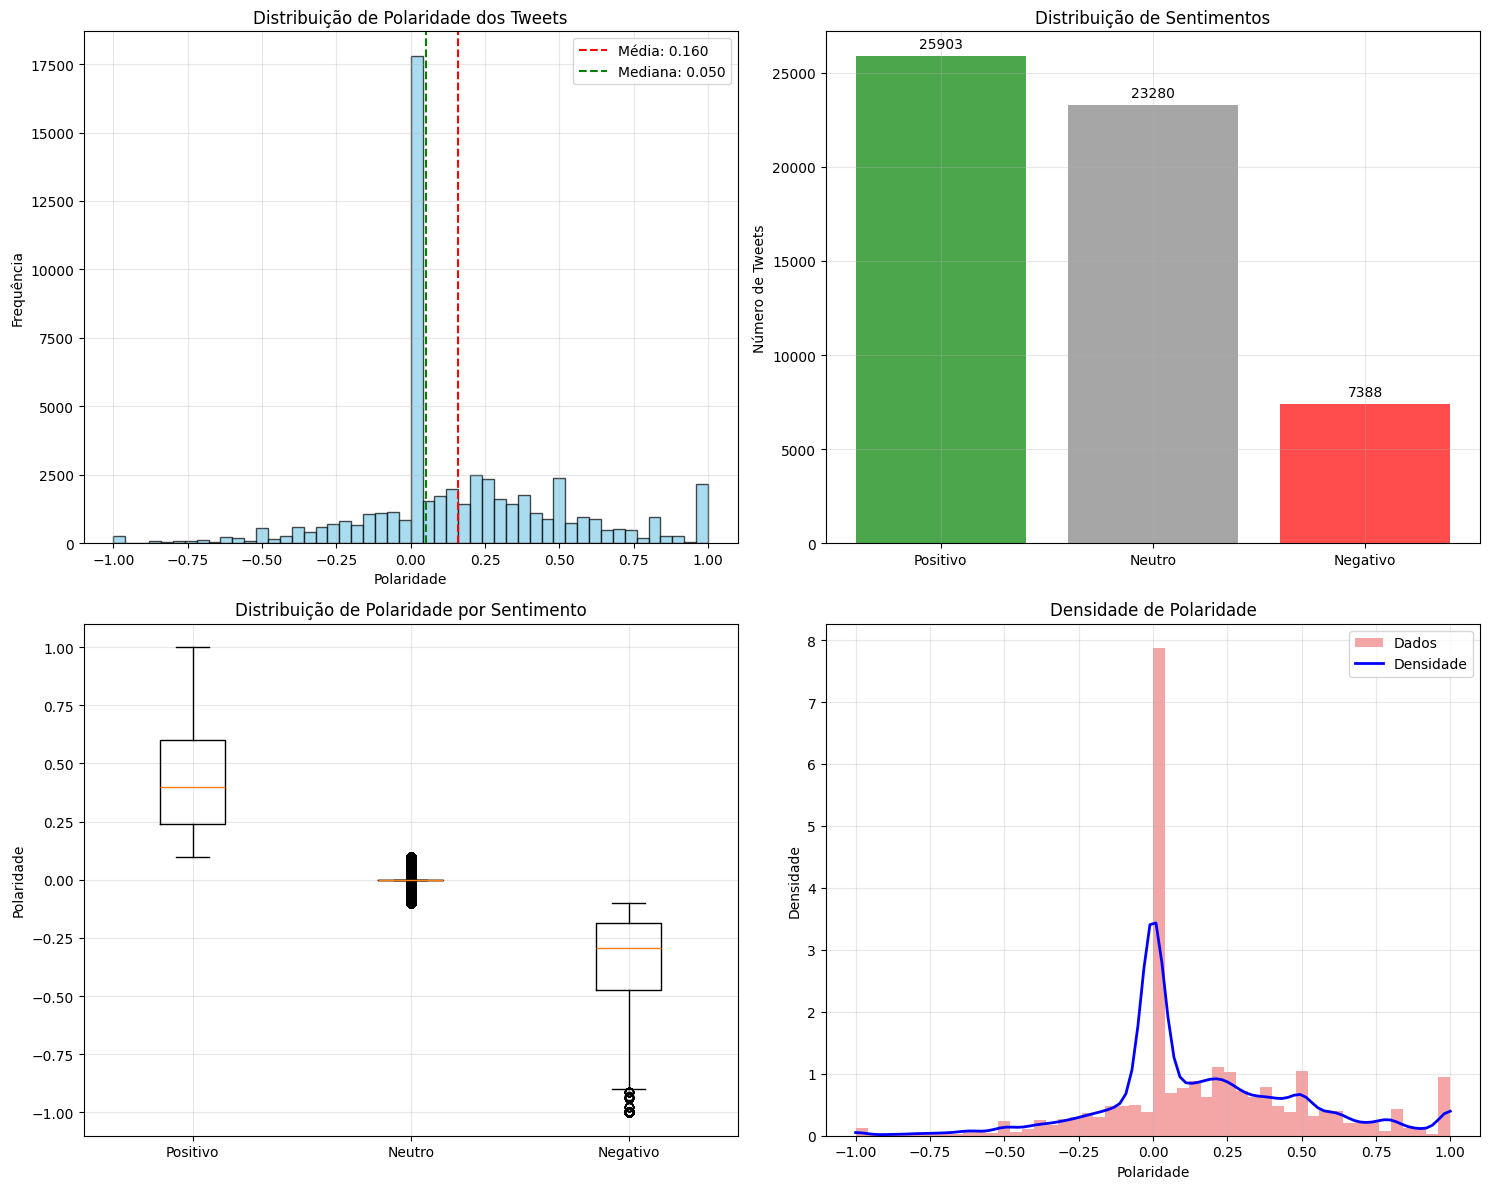


Análise estatística detalhada:
  Polaridade mínima: -1.000
  Polaridade máxima: 1.000
  Amplitude: 2.000
  Quartil 25%: 0.000
  Quartil 75%: 0.357
  Assimetria: 0.286
  Curtose: 0.834


In [18]:
# Visualização da distribuição de polaridade
print("=== VISUALIZAÇÃO DA DISTRIBUIÇÃO DE POLARIDADE ===")

# Configurar estilo dos gráficos
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histograma de polaridade
axes[0, 0].hist(polarities, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(np.mean(polarities), color='red', linestyle='--', 
                   label=f'Média: {np.mean(polarities):.3f}')
axes[0, 0].axvline(np.median(polarities), color='green', linestyle='--', 
                   label=f'Mediana: {np.median(polarities):.3f}')
axes[0, 0].set_xlabel('Polaridade')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('Distribuição de Polaridade dos Tweets')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Gráfico de barras dos sentimentos
sentiment_labels = list(sentiment_counts.keys())
sentiment_values = list(sentiment_counts.values())
colors = ['green' if s == 'Positivo' else 'red' if s == 'Negativo' else 'gray' for s in sentiment_labels]

axes[0, 1].bar(sentiment_labels, sentiment_values, color=colors, alpha=0.7)
axes[0, 1].set_ylabel('Número de Tweets')
axes[0, 1].set_title('Distribuição de Sentimentos')
axes[0, 1].grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(sentiment_values):
    axes[0, 1].text(i, v + max(sentiment_values)*0.01, str(v), ha='center', va='bottom')

# 3. Box plot de polaridade por sentimento
sentiment_data = [df_sentiment_sample[df_sentiment_sample['sentiment'] == s]['polarity'].values 
                  for s in sentiment_labels]
axes[1, 0].boxplot(sentiment_data, labels=sentiment_labels)
axes[1, 0].set_ylabel('Polaridade')
axes[1, 0].set_title('Distribuição de Polaridade por Sentimento')
axes[1, 0].grid(True, alpha=0.3)

# 4. Densidade de polaridade
from scipy import stats
axes[1, 1].hist(polarities, bins=50, density=True, alpha=0.7, color='lightcoral', 
                label='Dados')
# Adicionar curva de densidade
density = stats.gaussian_kde(polarities)
x_range = np.linspace(min(polarities), max(polarities), 100)
axes[1, 1].plot(x_range, density(x_range), 'b-', linewidth=2, label='Densidade')
axes[1, 1].set_xlabel('Polaridade')
axes[1, 1].set_ylabel('Densidade')
axes[1, 1].set_title('Densidade de Polaridade')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise estatística adicional
print(f"\nAnálise estatística detalhada:")
print(f"  Polaridade mínima: {min(polarities):.3f}")
print(f"  Polaridade máxima: {max(polarities):.3f}")
print(f"  Amplitude: {max(polarities) - min(polarities):.3f}")
print(f"  Quartil 25%: {np.percentile(polarities, 25):.3f}")
print(f"  Quartil 75%: {np.percentile(polarities, 75):.3f}")

# Análise de assimetria
from scipy.stats import skew, kurtosis
print(f"  Assimetria: {skew(polarities):.3f}")
print(f"  Curtose: {kurtosis(polarities):.3f}")


## Conclusões da Análise de Mineração de Texto

### **Parte 2a - Análise de Tópicos com LDA:**

**Tópicos Identificados:**
Os 5 tópicos latentes identificados pelo LDA (usando 44.953 tweets) revelam os principais temas:

1. **Tópico 1**: Campanhas e eleições (realdonaldtrump, thank, vote, great, presid, run, republican, love, need, thi, win, poll, democrat, countri, work)
2. **Tópico 2**: Imagem pessoal e campanha (trump, donald, look, american, thi, veri, know, peopl, presid, good, right, campaign, countri, wonder, man)
3. **Tópico 3**: Política nacional e fronteiras (great, make, america, amp, border, new, nation, today, true, hous, big, peopl, talk, tax, militari)
4. **Tópico 4**: Economia e comércio internacional (great, year, job, countri, deal, amp, best, china, world, state, unit, rate, day, thi, veri)
5. **Tópico 5**: Mídia e oposição (news, obama, amp, fake, think, thi, watch, whi, hillari, realli, media, like, noth, good, foxnew)

**Avaliação dos Tópicos:**
- **Perplexidade**: 631.47 (indica qualidade moderada dos tópicos)
- **Log-likelihood**: -2.221.797.09
- **Coesão**: Os tópicos mostram palavras semanticamente relacionadas
- **Distribuição**: Tópico 5 (mídia) tem maior probabilidade média (0.2290), seguido pelo Tópico 1 (0.2108)

**Sugestões de Melhorias no Preprocessamento:**
1. **Remoção de stopwords específicas**: Adicionar stopwords relacionadas ao Twitter (rt, https, etc.)
2. **Normalização de hashtags**: Manter hashtags como palavras únicas
3. **Tratamento de emojis**: Remover ou normalizar emojis
4. **Limpeza de caracteres especiais**: Remover caracteres não-ASCII
5. **Filtragem por frequência**: Ajustar parâmetros min_df e max_df
6. **Lemmatização**: Usar lemmatização em vez de stemming para melhor interpretação

### **Parte 2b - Análise de Sentimento:**

**Sentimento dos 5 Tweets Mais Retweetados:**
- **Positivo**: 2 tweets (40%) - incluindo o anúncio de COVID-19 e "TODAY WE MAKE AMERICA GREAT AGAIN!"
- **Neutro**: 3 tweets (60%) - incluindo críticas à CNN e pergunta sobre impeachment
- **Negativo**: 0 tweets (0%)

**Análise Geral de Sentimento (56.571 tweets):**
- **Distribuição**: 45.8% positivos, 41.2% neutros, 13.1% negativos
- **Polaridade média**: 0.160 (ligeiramente positiva)
- **Polaridade mediana**: 0.050 (próxima ao neutro)
- **Desvio padrão**: 0.346 (moderada variabilidade)

**Insights Principais:**
- Os tweets do Trump são predominantemente positivos (45.8%), seguidos por neutros (41.2%)
- Apenas 13.1% dos tweets são negativos, indicando um tom geral otimista
- Os tweets mais retweetados não seguem necessariamente o padrão geral, sendo mais neutros
- A distribuição mostra uma assimetria positiva (0.286), confirmando a tendência otimista
